In [55]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [56]:
df = pd.read_csv("Advertising.csv")

In [57]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [58]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [59]:
df.shape

(200, 5)

In [60]:
df.columns.values.tolist()

['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales']

In [61]:
df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of      Unnamed: 0     TV  Radio  Newspaper  Sales
0         False  False  False      False  False
1         False  False  False      False  False
2         False  False  False      False  False
3         False  False  False      False  False
4         False  False  False      False  False
..          ...    ...    ...        ...    ...
195       False  False  False      False  False
196       False  False  False      False  False
197       False  False  False      False  False
198       False  False  False      False  False
199       False  False  False      False  False

[200 rows x 5 columns]>

In [62]:
#Data Visualization

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

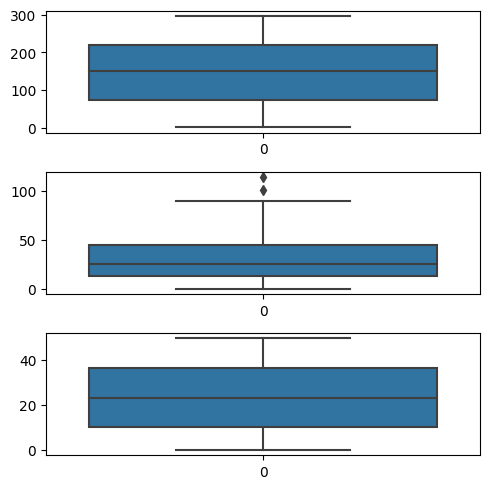

In [64]:
fig, axs=plt.subplots(3, figsize=(5,5))
plt1= sns.boxplot(df['TV'], ax=axs[0])
plt2=sns.boxplot(df['Newspaper'], ax=axs[1])
plt3=sns.boxplot(df['Radio'], ax=axs[2])
plt.tight_layout()

<AxesSubplot: xlabel='Newspaper', ylabel='Density'>

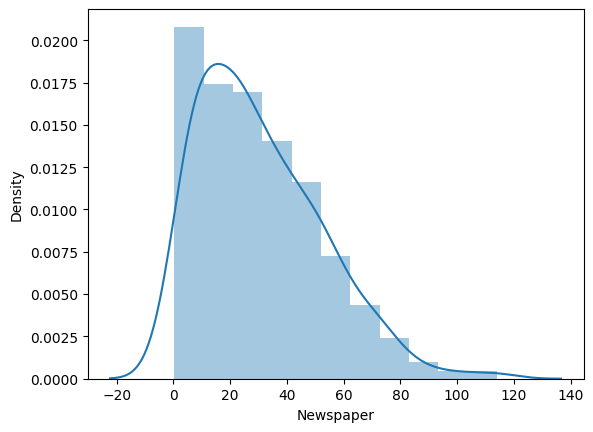

In [65]:
sns.distplot(df['Newspaper'])

In [66]:
iqr= df.Newspaper.quantile(0.75)- df.Newspaper.quantile(0.25)
lower_bridge=df["Newspaper"].quantile(0.25) - (iqr*1.5)
upper_bridge=df["Newspaper"].quantile(0.75) + (iqr*1.5)
print(lower_bridge)
print(upper_bridge)

-35.775000000000006
93.625


In [67]:
data =df.copy()

In [68]:
data.loc[data["Newspaper"]>=93, "Newspaper"]=93

<AxesSubplot: >

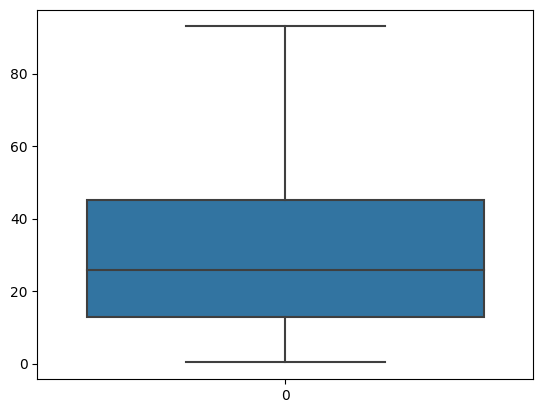

In [69]:

sns.boxplot(data["Newspaper"])

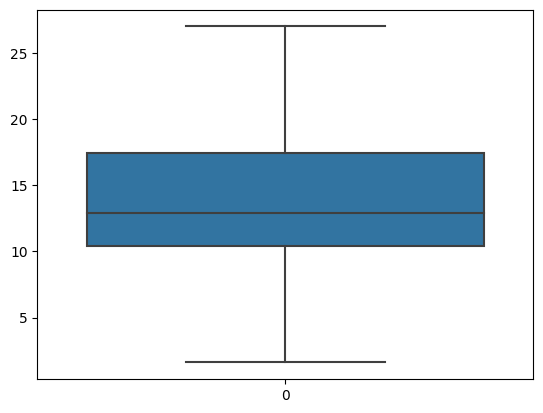

In [70]:
sns.boxplot(data["Sales"]);

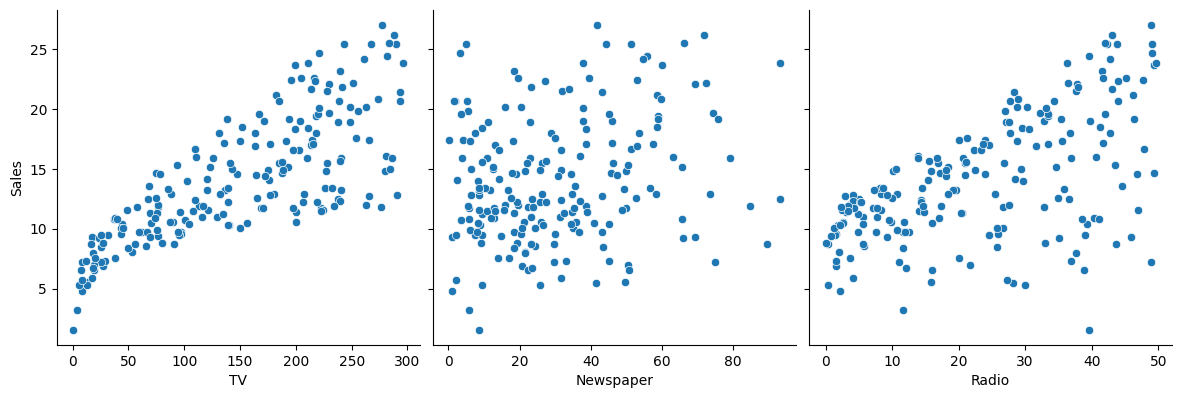

In [71]:
sns.pairplot(data,x_vars=['TV','Newspaper','Radio'],
             y_vars="Sales", height=4, aspect=1, kind="scatter")
plt.show()

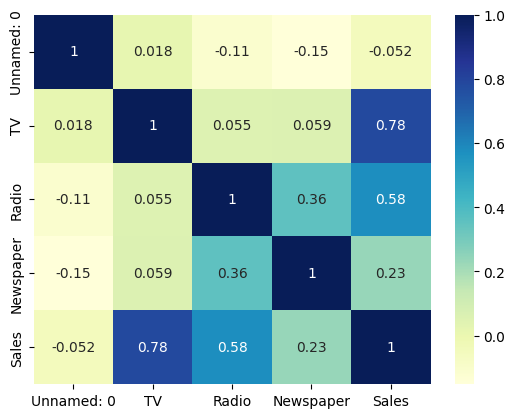

In [72]:
sns.heatmap(data.corr(),cmap="YlGnBu",annot=True)
plt.show()

In [73]:
important_features= list(df.corr()["Sales"][(df.corr()["Sales"]>+0.5)|(df.corr()["Sales"]<-0.5)].index)
print(important_features)

['TV', 'Radio', 'Sales']


In [74]:
x=data['TV']
y=data['Sales']
X=x.values.reshape(-1,1)

In [75]:
#Splitting training and testing data

In [76]:
X

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [77]:
x

0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64

In [78]:
print(X.shape,y.shape)

(200, 1) (200,)


In [79]:
#Model Training

In [80]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.33)

In [81]:
print(X_train.shape,y_train.shape)

(134, 1) (134,)


In [82]:
from sklearn.metrics import  mean_squared_error , r2_score
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor().fit(X_train, y_train)
knn

KNeighborsRegressor()

In [83]:
knn_train_pred = knn.predict(X_train)
knn_test_pred = knn.predict(X_test)

In [84]:
print(knn_train_pred, knn_test_pred)

[10.88 19.26 21.3  20.34 12.74 10.12 12.92  7.26 15.02 10.96 10.62 15.02
 10.98 10.4   9.6  10.88 11.32 13.7  20.54 19.76 18.94 16.28 17.34 19.42
 21.38 20.82 13.7  14.08 18.6  14.72 20.54 16.2  10.12 19.28  8.12 11.1
 19.06 13.52  6.08 15.14  5.26 12.72 16.12 13.68 20.78 10.12 17.84 13.46
 11.7  19.58 11.7  16.78 15.14 14.04 13.7  16.2   9.9  17.42 15.98 14.68
 15.98 20.82 10.5  18.86 15.14 20.78 15.02  5.26 10.88 16.78  9.6  13.54
 19.28  8.12 17.22  9.72  8.12 13.52  8.12 14.32 19.06 11.32 18.44 10.7
  9.72  7.9  19.48 14.12 19.76 16.04 10.5  17.72 13.68 15.14  5.26 12.74
 16.78 17.22 10.5   7.9  11.36 17.5  10.5   9.6   5.26 13.46 16.86 10.88
 13.46  7.9  14.32 18.44 15.86  7.9  10.96  8.12  6.08 13.52 16.24 16.86
 13.7   9.76 15.44 11.36 20.82 10.88 17.42 14.04 14.72 17.72 11.46 10.5
 12.72 19.76] [11.36 10.88 17.22 16.2  16.2  13.82 15.08 12.92 12.92 17.06 16.88 16.46
 10.96 13.54 17.5  11.36  8.12 15.98 13.06 13.6  13.7  12.72 14.8  16.06
  6.08  8.12 14.32 16.78 13.68  7.9   7.

In [85]:
Results = pd.DataFrame(columns=["Model","Train R2","Test R2","Test RMSE","Variance"])


In [86]:
r2 = r2_score(y_test,knn_test_pred)
r2_train = r2_score(y_train,knn_train_pred)


In [87]:
rmse = np.sqrt(mean_squared_error(y_test,knn_test_pred))
variance = r2_train - r2
#Results = Results.append({"Model":"K-Nearest Neighbors","Train R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"Variance":variance},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

R2: 0.5997321945300702
RMSE: 3.3829707224702537


In [88]:
Results.head()

,Model,Train R2,Test R2,Test RMSE,Variance


In [89]:
import statsmodels.api as sm
X_train_constant = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_constant).fit()

In [90]:
model.params

const    7.184221
x1       0.045082
dtype: float64

In [91]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     188.8
Date:                Sun, 16 Apr 2023   Prob (F-statistic):           3.14e-27
Time:                        10:59:21   Log-Likelihood:                -349.74
No. Observations:                 134   AIC:                             703.5
Df Residuals:                     132   BIC:                             709.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1842      0.568     12.638      0.0

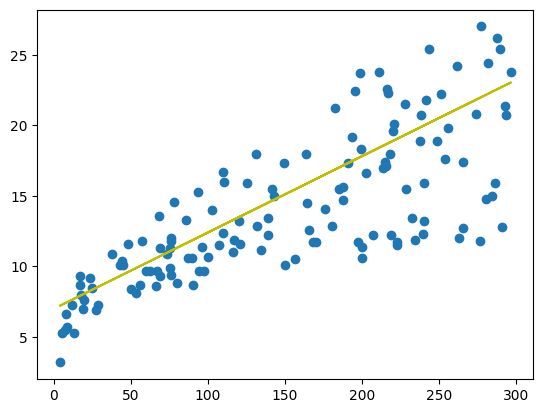

In [92]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.9955 + 0.0541 * X_train, 'y')
plt.show()

In [93]:
y_train_pred = model.predict(X_train_constant)
res = (y_train - y_train_pred)
res

191   -0.687879
169   -5.000908
35    -7.489430
98     5.155651
164   -0.567780
         ...   
147    7.251944
63     2.185903
49    -0.500178
151   -1.039090
175    7.332695
Name: Sales, Length: 134, dtype: float64

In [94]:
y_train_pred

array([10.58787906, 20.00090826, 20.28943022, 20.24434867, 12.46778001,
        9.3616607 , 14.85710255,  7.77478988, 17.21035985, 11.43090419,
        9.1272366 , 17.12470489, 11.25959427, 11.04771095,  9.77641103,
       10.62394431, 10.70959927, 14.60013768, 18.69805125, 19.52304375,
       17.03003362, 17.0931478 , 16.09233723, 19.87017174, 20.0775469 ,
       20.5463951 , 14.77595575, 14.24399337, 19.81607387, 17.47634104,
       18.62592076, 17.92264846,  9.19035078, 16.89478895,  7.95962427,
       11.71040984, 15.9931578 , 12.13417648,  7.7116757 , 16.15995956,
        7.36905586, 12.60302468, 16.31323686, 13.93293063, 18.40051297,
        9.1993671 , 15.7993071 , 13.46408243, 11.22803718, 16.80462583,
       11.11533329, 18.00830342, 16.15094325, 13.12146259, 14.64972739,
       17.88658321,  9.99280251, 19.15788313, 15.51980145, 13.62637604,
       15.41611387, 20.38860965, 10.30386525, 15.91651915, 16.19151665,
       18.49518424, 17.21035985,  7.53585763, 10.62845247, 18.00

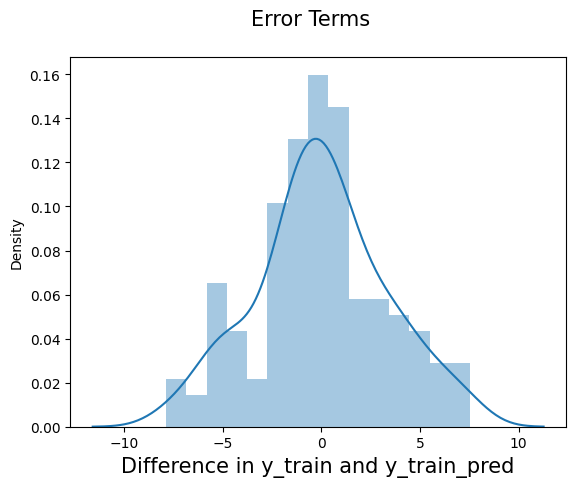

In [95]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Difference in y_train and y_train_pred', fontsize = 15)
plt.show()

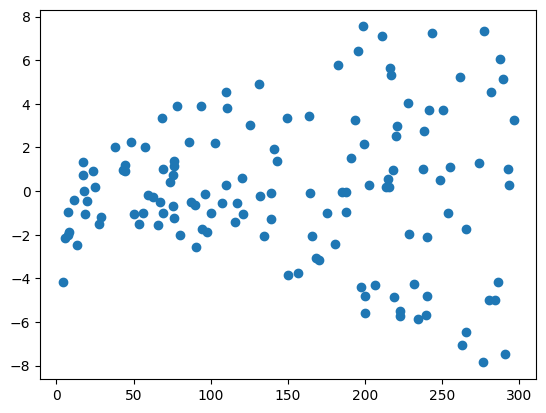

In [96]:
plt.scatter(X_train, res)
plt.show()
     

In [97]:
X_test_constant = sm.add_constant(X_test)
y_pred = model.predict(X_test_constant)
y_pred

array([11.56614886, 10.56984644, 19.02714662, 17.88658321, 17.97223817,
       16.38536735, 15.16365714, 14.96079014, 14.90669227, 15.89397837,
       17.28249034, 15.6775869 , 10.36697943, 13.3243296 , 16.68290563,
       11.49852652,  8.0272466 , 15.51980145, 11.89975239, 12.27392931,
       14.70382526, 12.7337612 , 17.53043891, 17.36363715,  7.57192287,
        7.95962427, 15.07800218, 17.99928711, 14.01407743,  8.31126041,
        8.33830935, 16.42594075, 15.16365714,  8.84773095,  8.60429054,
       13.82473489, 13.01777501,  7.77929804, 13.27924804,  8.964943  ,
       17.42675133, 19.21648916,  7.57643103, 13.40096825, 16.51159571,
       16.80913399, 19.83861465,  8.90633697, 18.38248034, 16.63331592,
       13.47309874, 19.96935117,  7.21577857, 10.24075107,  9.12272845,
       14.54603981, 13.50916399, 17.55748784,  8.05880369, 12.61654915,
       16.99847653, 17.11568858, 10.55181382,  8.39240722, 16.09233723,
       11.164923  ])

In [98]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [99]:
np.sqrt(mean_squared_error(y_test, y_pred))

3.1841502469384877

In [100]:
r2 = r2_score(y_test, y_pred)
r2

0.6453979141760833

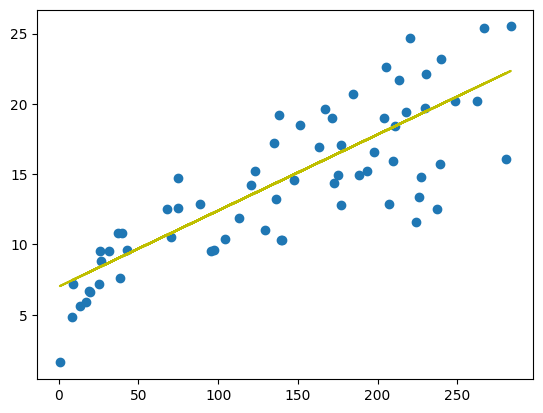

In [101]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.9955 + 0.0541 * X_test, 'y')
plt.show()